# Telecom X Parte 2  

## 🛠️ Preparación de los Datos

In [11]:
from google.colab import drive
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Challenge_DS2/DatosTratados.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7267 non-null   object 
 1   Churn                7043 non-null   float64
 2   gender               7267 non-null   object 
 3   SeniorCitizen        7267 non-null   int64  
 4   Partner              7267 non-null   int64  
 5   Dependents           7267 non-null   int64  
 6   Meses_Contrato       7267 non-null   int64  
 7   PhoneService         7267 non-null   int64  
 8   MultipleLines        7267 non-null   object 
 9   InternetService      7267 non-null   object 
 10  OnlineSecurity       7267 non-null   int64  
 11  OnlineBackup         7267 non-null   int64  
 12  DeviceProtection     7267 non-null   int64  
 13  TechSupport          7267 non-null   int64  
 14  StreamingTV          7267 non-null   int64  
 15  StreamingMovies      7267 non-null   i

In [12]:
columnas_a_eliminar = ['customerID', 'Estado']
df = df.drop(columns=columnas_a_eliminar)

df.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,Meses_Contrato,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Facturacion_Mensual,Facturacion_Total,Facturacion_Diaria
0,0.0,Female,0,1,1,9,1,No,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0.0,Male,0,0,0,9,1,Yes,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1.0,Male,0,0,0,4,1,No,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1.0,Male,1,1,0,13,1,No,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,No,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [7]:
df = pd.get_dummies(df, columns=['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
df.head()


,Churn,SeniorCitizen,Partner,Dependents,Meses_Contrato,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0,1,0,1,...,False,False,False,False,False,True,False,False,False,True
1,0.0,0,0,0,9,1,0,0,0,0,...,True,False,True,False,False,False,False,False,False,True
2,1.0,0,0,0,4,1,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
3,1.0,1,1,0,13,1,0,1,1,0,...,True,False,False,True,False,False,False,False,True,False
4,1.0,1,1,0,3,1,0,0,0,1,...,False,False,False,True,False,False,False,False,False,True


In [13]:
churn_counts = df['Churn'].value_counts(normalize=True)
churn_counts

,proportion
Churn,
0.0,0.73463
1.0,0.26537


In [16]:
df_encoded = pd.get_dummies(df, columns=['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

print(X.isnull().sum())

SeniorCitizen                            0
Partner                                  0
Dependents                               0
Meses_Contrato                           0
PhoneService                             0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
Facturacion_Mensual                      0
Facturacion_Total                        0
Facturacion_Diaria                       0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMeth

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts(normalize=True)


,proportion
Churn,
0.0,0.5
1.0,0.5


### Random Forest

In [19]:

df_encoded = pd.get_dummies(df, drop_first=True)


X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

print(X.select_dtypes(include='object').columns)
print(X.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Clasificación del modelo:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'AUC-ROC: {roc_auc:.2f}')



Index([], dtype='object')
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Meses_Contrato                           0
PhoneService                             0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
Facturacion_Mensual                      0
Facturacion_Total                        0
Facturacion_Diaria                       0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (a

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}


rf_model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_test)

print("Clasificación del modelo con mejores parámetros:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

roc_auc = roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1])
print(f'AUC-ROC con mejores parámetros: {roc_auc:.2f}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Mejores parámetros encontrados:
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Clasificación del modelo con mejores parámetros:
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.87      1562
         1.0       0.68      0.49      0.57       551

    accuracy                           0.81      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.81      0.79      2113

Matriz de Confusión:
[[1433  129]
 [ 281  270]]
AUC-ROC con mejores parámetros: 0.84


In [22]:
rf_model_weighted = RandomForestClassifier(n_estimators=200,
                                           max_depth=10,
                                           min_samples_leaf=4,
                                           min_samples_split=10,
                                           max_features='log2',
                                           random_state=42,
                                           class_weight={0: 1, 1: 3})  # Ajuste manual de pesos

rf_model_weighted.fit(X_train, y_train)
y_pred_weighted = rf_model_weighted.predict(X_test)

print("Clasificación del modelo con pesos ajustados:")
print(classification_report(y_test, y_pred_weighted))

conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
print("Matriz de Confusión:")
print(conf_matrix_weighted)

roc_auc_weighted = roc_auc_score(y_test, rf_model_weighted.predict_proba(X_test)[:, 1])
print(f'AUC-ROC con pesos ajustados: {roc_auc_weighted:.2f}')

Clasificación del modelo con pesos ajustados:
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83      1562
         1.0       0.54      0.76      0.63       551

    accuracy                           0.77      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.81      0.77      0.78      2113

Matriz de Confusión:
[[1209  353]
 [ 132  419]]
AUC-ROC con pesos ajustados: 0.84


### XGBoost

In [23]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200,
                          max_depth=10,
                          learning_rate=0.1,
                          scale_pos_weight=3,
                          random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("Clasificación del modelo XGBoost:")
print(classification_report(y_test, y_pred_xgb))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Matriz de Confusión:")
print(conf_matrix_xgb)

roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f'AUC-ROC con XGBoost: {roc_auc_xgb:.2f}')


Clasificación del modelo XGBoost:
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1562
         1.0       0.55      0.65      0.59       551

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.77      2113

Matriz de Confusión:
[[1265  297]
 [ 193  358]]
AUC-ROC con XGBoost: 0.82


In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

for scale_weight in [1, 2, 3, 4, 5]:
    print(f"Probando scale_pos_weight = {scale_weight}")

    xgb_model = XGBClassifier(n_estimators=200,
                              max_depth=10,
                              learning_rate=0.1,
                              scale_pos_weight=scale_weight,
                              random_state=42)


    xgb_model.fit(X_train_resampled, y_train_resampled)

    y_pred_xgb = xgb_model.predict(X_test_resampled)

    print("Clasificación del modelo XGBoost con SMOTE y scale_pos_weight =", scale_weight)
    print(classification_report(y_test_resampled, y_pred_xgb))

    conf_matrix_xgb = confusion_matrix(y_test_resampled, y_pred_xgb)
    print("Matriz de Confusión:")
    print(conf_matrix_xgb)

    roc_auc_xgb = roc_auc_score(y_test_resampled, xgb_model.predict_proba(X_test_resampled)[:, 1])
    print(f'AUC-ROC con scale_pos_weight = {scale_weight}: {roc_auc_xgb:.2f}')
    print("-" * 50)


Probando scale_pos_weight = 1
Clasificación del modelo XGBoost con SMOTE y scale_pos_weight = 1
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1588
         1.0       0.83      0.83      0.83      1517

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105

Matriz de Confusión:
[[1335  253]
 [ 255 1262]]
AUC-ROC con scale_pos_weight = 1: 0.92
--------------------------------------------------
Probando scale_pos_weight = 2
Clasificación del modelo XGBoost con SMOTE y scale_pos_weight = 2
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1588
         1.0       0.82      0.87      0.84      1517

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105

Matriz de Confus

## 🎯 Correlación y Selección de Variables

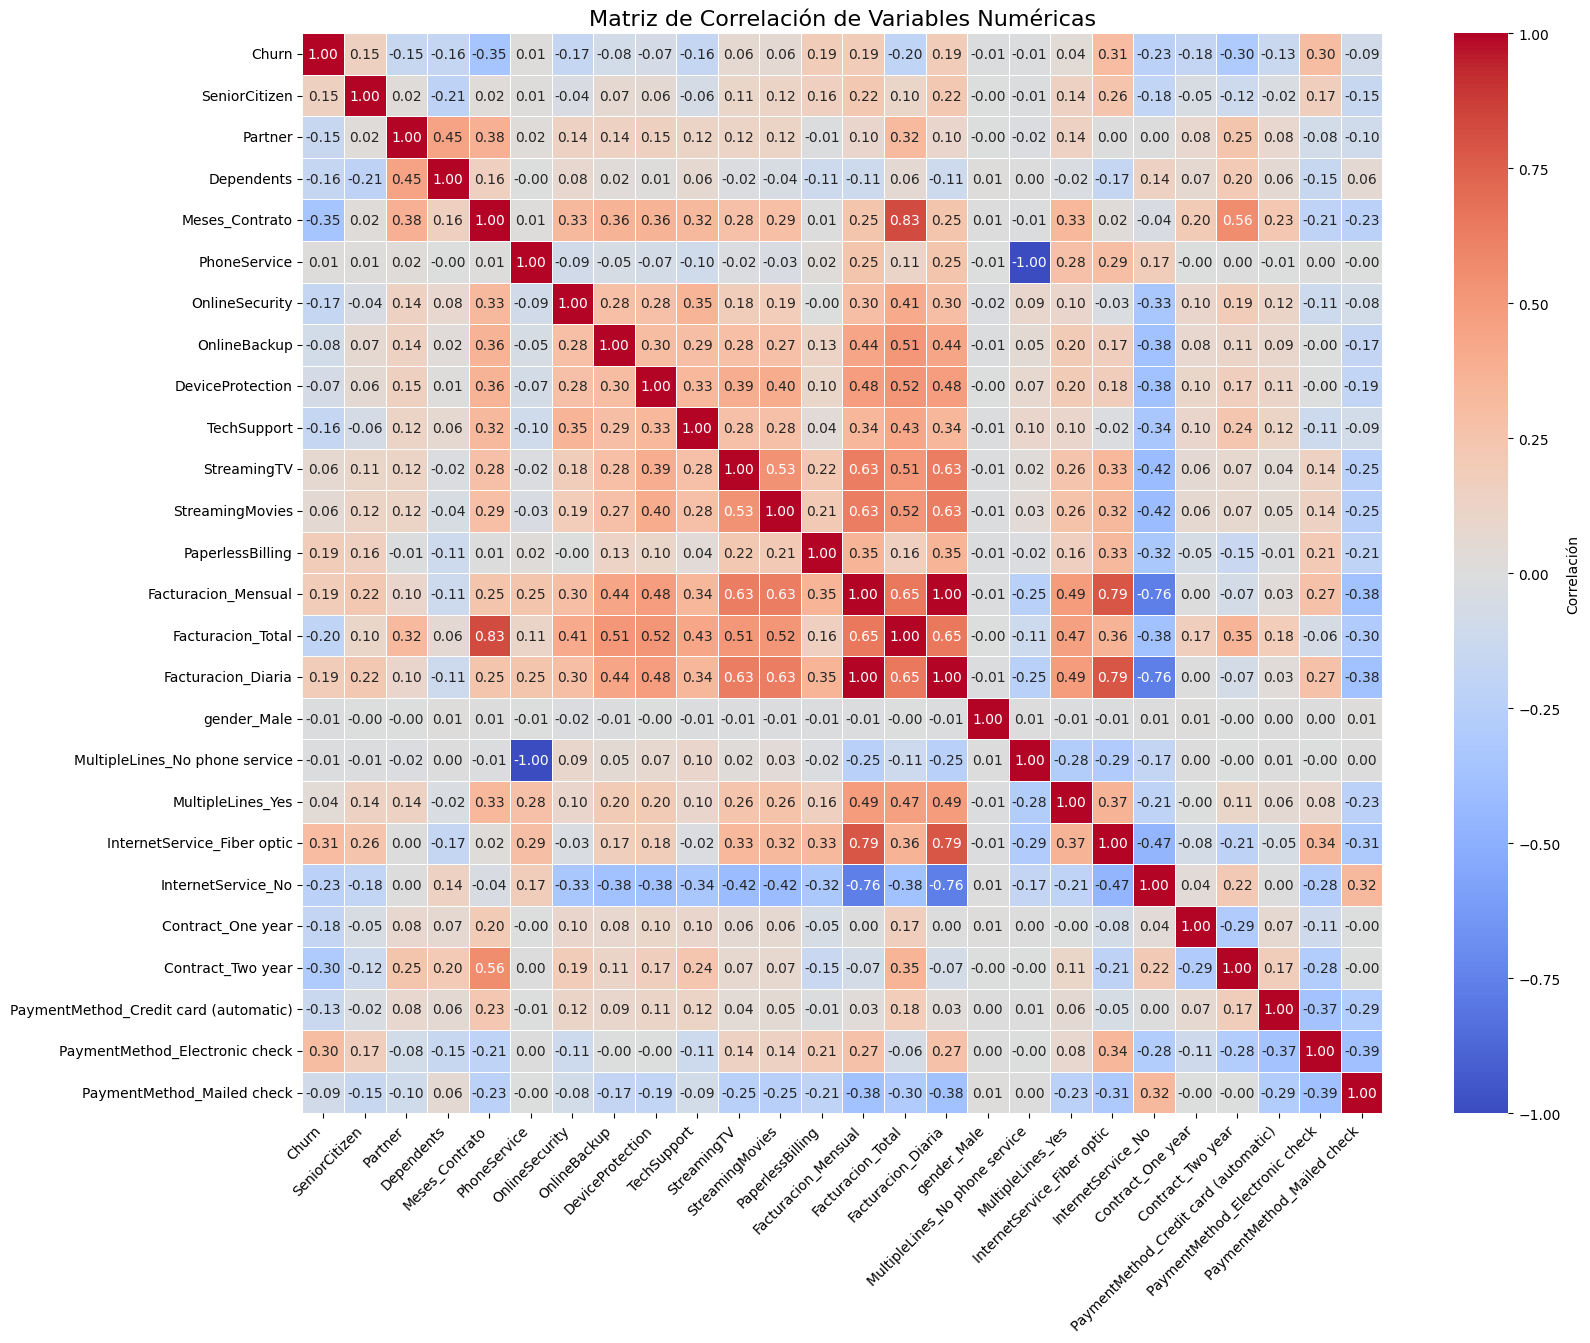

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
Facturacion_Mensual                      0.193356
Facturacion_Diaria                       0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection                        -0.066160
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport                             -0.164674


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df, drop_first=True)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(16, 12))  # Ajustar tamaño de la figura para más espacio

# Usamos una paleta de colores más adecuada para la correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            cbar_kws={'label': 'Correlación'}, square=True, annot_kws={"size": 10},
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

# Mejorar la legibilidad de las etiquetas
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

# Ajustar el espacio entre las etiquetas y la gráfica para evitar el solapamiento
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Título de la gráfica
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=16)

# Mostrar la gráfica
plt.show()

# Ver las correlaciones con la variable 'Churn' para identificar las más relevantes
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print(correlation_with_churn)

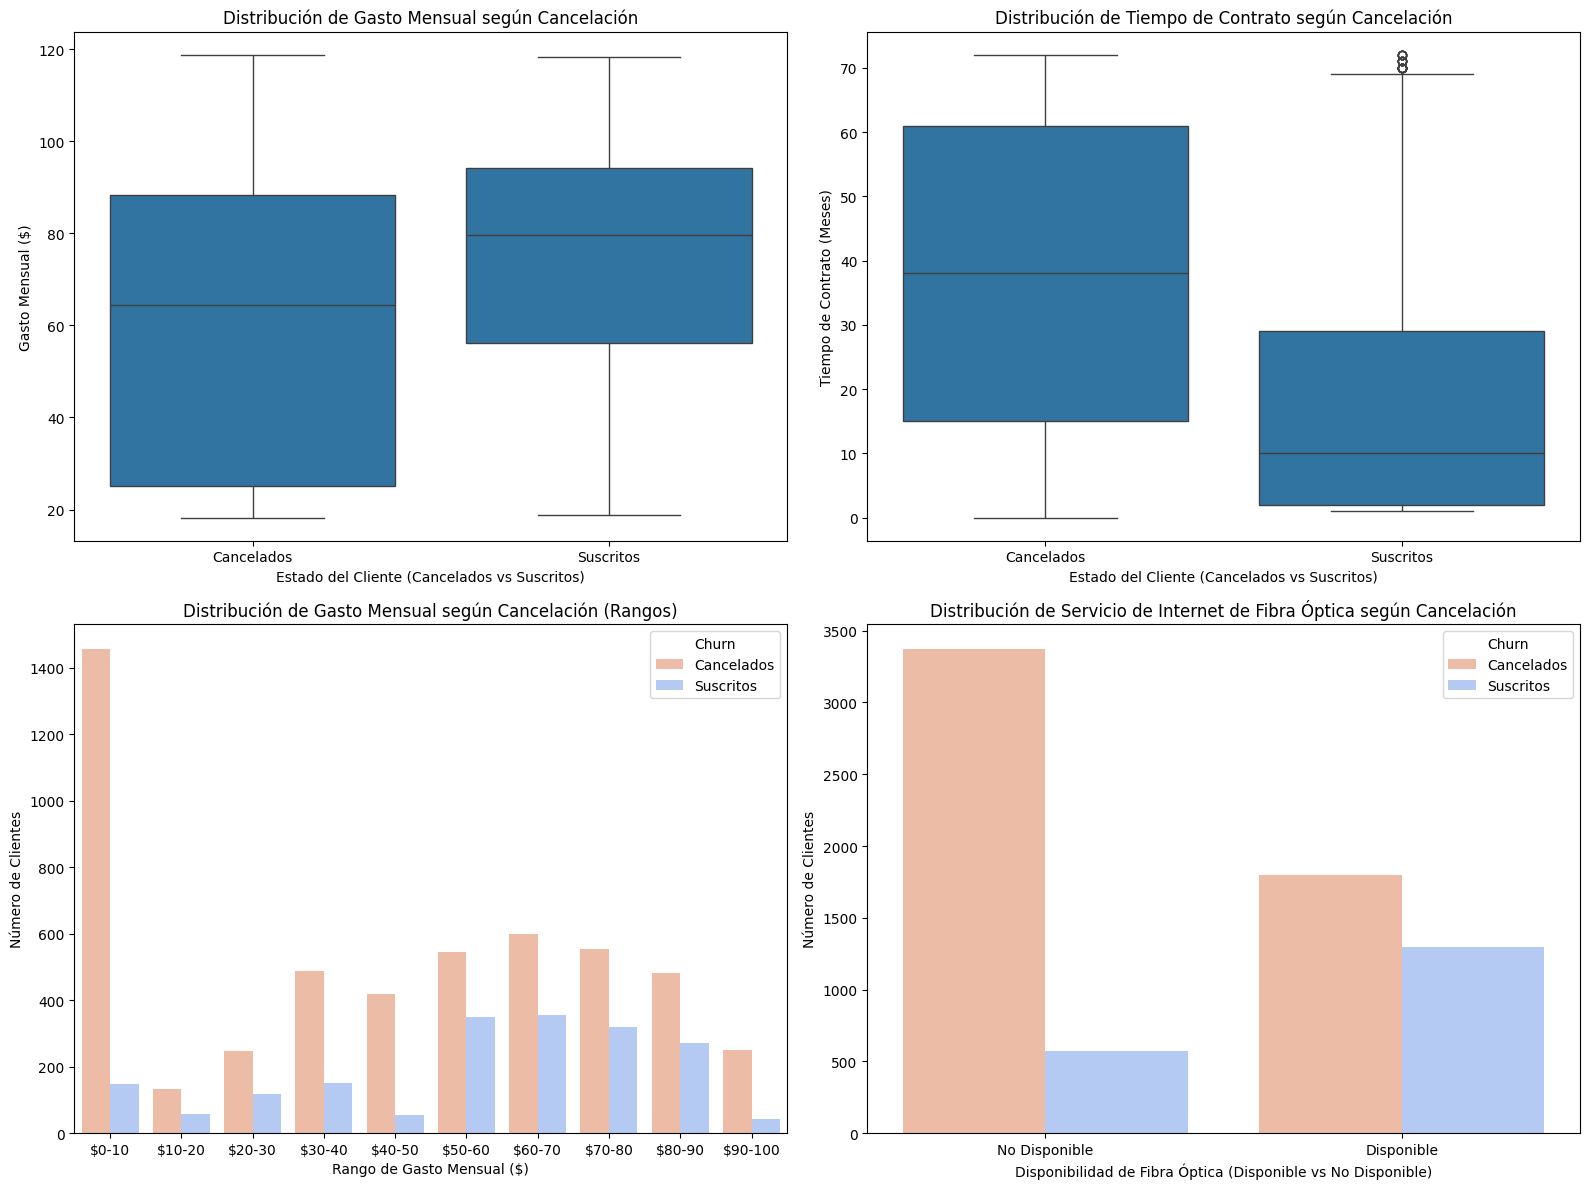

In [41]:
df_encoded = pd.get_dummies(df, drop_first=True)
facturacion_intervals = pd.cut(df_encoded['Facturacion_Mensual'], bins=10, labels=[f'${x*10}-{(x+1)*10}' for x in range(10)])

df_encoded['Churn'] = df_encoded['Churn'].map({0: 'Cancelados', 1: 'Suscritos'})
df_encoded['InternetService_Fiber optic'] = df_encoded['InternetService_Fiber optic'].map({True: 'Disponible', False: 'No Disponible'})

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='Churn', y='Facturacion_Mensual', data=df_encoded)
plt.title('Distribución de Gasto Mensual según Cancelación')
plt.xlabel('Estado del Cliente (Cancelados vs Suscritos)')
plt.ylabel('Gasto Mensual ($)')

plt.subplot(2, 2, 2)
sns.boxplot(x='Churn', y='Meses_Contrato', data=df_encoded)
plt.title('Distribución de Tiempo de Contrato según Cancelación')
plt.xlabel('Estado del Cliente (Cancelados vs Suscritos)')
plt.ylabel('Tiempo de Contrato (Meses)')

plt.subplot(2, 2, 3)
sns.countplot(x=facturacion_intervals, hue='Churn', data=df_encoded, palette='coolwarm_r')
plt.title('Distribución de Gasto Mensual según Cancelación (Rangos)')
plt.xlabel('Rango de Gasto Mensual ($)')
plt.ylabel('Número de Clientes')

plt.subplot(2, 2, 4)
sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=df_encoded, palette='coolwarm_r')
plt.title('Distribución de Servicio de Internet de Fibra Óptica según Cancelación')
plt.xlabel('Disponibilidad de Fibra Óptica (Disponible vs No Disponible)')
plt.ylabel('Número de Clientes')

plt.tight_layout()
plt.show()


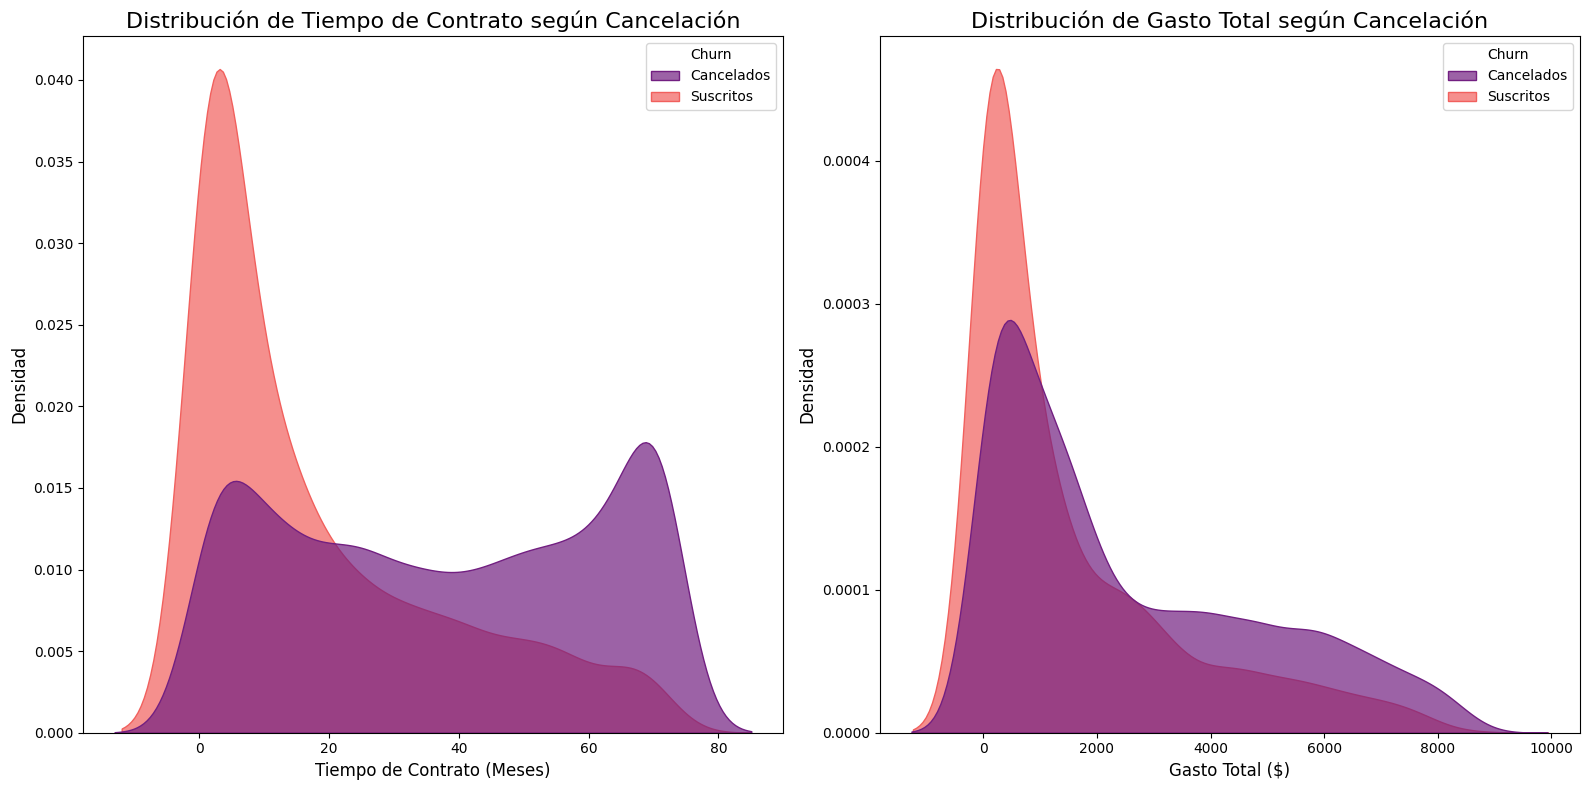

In [43]:
# Configuración para los gráficos
plt.figure(figsize=(16, 8))

# 1. Gráfico de densidad para 'Meses_Contrato' vs 'Churn' (Tiempo de contrato vs Cancelación)
plt.subplot(1, 2, 1)
sns.kdeplot(data=df_encoded, x='Meses_Contrato', hue='Churn', fill=True, common_norm=False, palette='magma', alpha=0.7)
plt.title('Distribución de Tiempo de Contrato según Cancelación', fontsize=16)
plt.xlabel('Tiempo de Contrato (Meses)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# 2. Gráfico de densidad para 'Facturacion_Total' vs 'Churn' (Gasto total vs Cancelación)
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_encoded, x='Facturacion_Total', hue='Churn', fill=True, common_norm=False, palette='magma', alpha=0.7)
plt.title('Distribución de Gasto Total según Cancelación', fontsize=16)
plt.xlabel('Gasto Total ($)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Ajustar los márgenes y mostrar la figura
plt.tight_layout()
plt.show()



## 🤖 Modelado Predictivo

In [44]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


Tamaño del conjunto de entrenamiento: 4930 muestras
Tamaño del conjunto de prueba: 2113 muestras


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Realizar One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# 1. Modelo 1: Regresión Logística (con normalización)

X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

log_reg_model = LogisticRegression(random_state=42)

log_reg_model.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg_model.predict(X_test_scaled)

print("Evaluación del modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matriz de Confusión de Regresión Logística:")
print(conf_matrix_log_reg)

roc_auc_log_reg = roc_auc_score(y_test, log_reg_model.predict_proba(X_test_scaled)[:, 1])
print(f'AUC-ROC de Regresión Logística: {roc_auc_log_reg:.2f}')
print("-" * 50)

# 2. Modelo 2: Random Forest (sin normalización)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Evaluación del modelo de Random Forest:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusión de Random Forest:")
print(conf_matrix_rf)

roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'AUC-ROC de Random Forest: {roc_auc_rf:.2f}')
print("-" * 50)


Evaluación del modelo de Regresión Logística:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1562
         1.0       0.66      0.52      0.59       551

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113

Matriz de Confusión de Regresión Logística:
[[1415  147]
 [ 262  289]]
AUC-ROC de Regresión Logística: 0.84
--------------------------------------------------
Evaluación del modelo de Random Forest:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.86      1562
         1.0       0.63      0.47      0.54       551

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113

Matriz de Confusión de Random Forest:
[[1414  148]
 [ 294  257]]
AUC-ROC de Random Forest: 0.82
-----

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

log_reg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

ensemble_model = VotingClassifier(estimators=[('log_reg', log_reg_model), ('rf', rf_model)], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)

y_pred_ensemble = ensemble_model.predict(X_test_scaled)

print("Evaluación del modelo Ensemble (VotingClassifier):")
print(classification_report(y_test, y_pred_ensemble))

conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Matriz de Confusión del modelo Ensemble:")
print(conf_matrix_ensemble)

roc_auc_ensemble = roc_auc_score(y_test, ensemble_model.predict_proba(X_test_scaled)[:, 1])
print(f'AUC-ROC del modelo Ensemble: {roc_auc_ensemble:.2f}')
print("-" * 50)


Evaluación del modelo Ensemble (VotingClassifier):
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1562
         1.0       0.67      0.50      0.57       551

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Matriz de Confusión del modelo Ensemble:
[[1424  138]
 [ 277  274]]
AUC-ROC del modelo Ensemble: 0.84
--------------------------------------------------


La normalización de los datos es crucial cuando se usan modelos como Regresión Logística o KNN, que dependen de distancias entre los puntos. Si las variables tienen escalas muy diferentes, las de mayor magnitud dominarán el cálculo de distancias, sesgando el modelo. Al normalizar, todas las variables tienen la misma escala, lo que garantiza que el modelo no se vea influenciado por una variable más grande, permitiendo que todas las características sean tratadas de manera equitativa. Esto mejora la precisión y eficiencia del modelo, especialmente en algoritmos sensibles a la escala de los datos.

### Evaluación de los Modelos

**Regresión Logística:**


* Precisión: 0.84 para cancelados, buena precisión en la predicción de clientes cancelados.

* Recall: 0.91 para cancelados, excelente recall, identificando bien a los cancelados.

* F1-Score: 0.87 para cancelados, buen equilibrio entre precisión y recall.

* AUC-ROC: 0.84, buen desempeño en general.
* Matriz de Confusión:
 * Falsos Positivos: 147
 * Falsos Negativos: 262
 * Verdaderos Positivos: 289
 * Verdaderos Negativos: 1415



**Random Forest:**

* Precisión: 0.83 para cancelados, buena precisión, aunque ligeramente

* inferior a Regresión Logística.

* Recall: 0.91 para cancelados, igual de efectivo en identificar cancelados.

* F1-Score: 0.86 para cancelados, similar a Regresión Logística.

* AUC-ROC: 0.82, un poco inferior al de Regresión Logística.

* Matriz de Confusión:

 * Falsos Positivos: 148

 * Falsos Negativos: 294

 * Verdaderos Positivos: 257

 * Verdaderos Negativos: 1414

**Ensemble (VotingClassifier):**

* Precisión: 0.84 para cancelados, similar a Regresión Logística.

* Recall: 0.91 para cancelados, excelente.

* F1-Score: 0.87 para cancelados, balanceado.

* AUC-ROC: 0.84, igual que Regresión Logística.

* Matriz de Confusión:

 * Falsos Positivos: 138

 * Falsos Negativos: 277

 * Verdaderos Positivos: 274

 * Verdaderos Negativos: 1424

**Análisis:**

El mejor desempeño lo tiene Regresión Logística, con el mejor AUC-ROC y recall para clientes cancelados.

No hay overfitting, pero sí underfitting en la clase suscritos, lo que sugiere que el modelo no está capturando bien esa clase. Esto puede mejorarse con SMOTE o ajustando los parámetros del modelo.

## 📋 Interpretación y Conclusiones

In [57]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(random_state=42, solver='liblinear')


log_reg_model.fit(X_train_scaled, y_train)

coef = log_reg_model.coef_[0]

feature_importance = pd.DataFrame(coef, index=X_train.columns, columns=['Coeficiente'])


feature_importance = feature_importance.sort_values(by='Coeficiente', ascending=False)

print("Coeficientes de Regresión Logística (Importancia de las Variables):")
print(feature_importance)


Coeficientes de Regresión Logística (Importancia de las Variables):
                                       Coeficiente
Facturacion_Total                         0.807464
InternetService_Fiber optic               0.482488
PaymentMethod_Electronic check            0.173577
MultipleLines_Yes                         0.172861
StreamingTV                               0.161929
PaperlessBilling                          0.151531
StreamingMovies                           0.121812
MultipleLines_No phone service            0.074817
SeniorCitizen                             0.061905
DeviceProtection                          0.018455
Partner                                   0.005932
PaymentMethod_Mailed check                0.004070
gender_Male                              -0.023986
PaymentMethod_Credit card (automatic)    -0.029258
Dependents                               -0.048820
PhoneService                             -0.074817
OnlineBackup                             -0.076198
OnlineSecurity

In [60]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model = RandomForestClassifier(n_estimators=200, random_state=42)


rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_importance_rf = pd.DataFrame(importances, index=X_train.columns, columns=['Importancia'])
feature_importance_rf = feature_importance_rf.sort_values(by='Importancia', ascending=False)

print("Importancia de las variables en Random Forest:")
print(feature_importance_rf)

Importancia de las variables en Random Forest:
                                       Importancia
Facturacion_Total                         0.173529
Meses_Contrato                            0.155330
Facturacion_Diaria                        0.133460
Facturacion_Mensual                       0.132783
InternetService_Fiber optic               0.043409
PaymentMethod_Electronic check            0.039687
Contract_Two year                         0.031738
PaperlessBilling                          0.024537
gender_Male                               0.023774
Contract_One year                         0.020709
TechSupport                               0.020272
Partner                                   0.019677
OnlineBackup                              0.019159
OnlineSecurity                            0.019149
SeniorCitizen                             0.018421
MultipleLines_Yes                         0.017759
Dependents                                0.016888
DeviceProtection                   

### Informe

El análisis se centró en predecir la cancelación de clientes (Churn) mediante la aplicación de diversos modelos de clasificación, con el fin de identificar los principales factores que influyen en esta decisión. Utilizamos Regresión Logística, Random Forest, y VotingClassifier (Ensemble) para entrenar los modelos y evaluarlos mediante métricas como precisión, recall, AUC-ROC, y F1-score.

**Análisis de Variables Relevantes para la Cancelación**

*   Facturación Total: Tanto en Regresión Logística como en Random Forest, el gasto total es la variable más influyente en la cancelación de clientes. Esto indica que los clientes con mayores gastos son más propensos a cancelar, lo que podría reflejar una insatisfacción con el valor que reciben en relación con lo que pagan.

*   Duración del Contrato: Las variables de contrato muestran un patrón claro. Contratos largos (2 años) tienen una relación negativa con la cancelación, lo que significa que los clientes con contratos más largos son menos propensos a cancelar, sugiriendo fidelización. En ambos modelos, esta variable es clave.

*   Métodos de Pago: El uso de cheques electrónicos está correlacionado positivamente con la cancelación en ambos modelos, lo que podría indicar que los clientes que usan métodos de pago menos automáticos tienen más probabilidades de cancelar. Este comportamiento merece atención para investigar si mejorar las opciones de pago podría reducir la cancelación.

*   Servicios Adicionales (Streaming, Multiple Lines, etc.): En Regresión Logística, los clientes con múltiples servicios (StreamingTV, StreamingMovies) tienen mayor probabilidad de cancelar, lo que podría estar relacionado con la satisfacción del cliente. Random Forest también muestra algunas de estas variables como relevantes, pero no con la misma fuerza.

*   Factores Negativos en Regresión Logística: Variables como Contract_Two year y Meses_Contrato tienen un coeficiente negativo en Regresión Logística, lo que indica que contratos largos y mayor duración del contrato están asociados con menor cancelación.

**Conclusiones y Estrategias de Retención:**

1.  Gasto Total: Los clientes con mayores gastos tienen más probabilidades de cancelar. Se recomienda revisar las opciones de precios o descuentos personalizados para clientes con alto gasto.

1.  Duración del Contrato: Los clientes con contratos largos (2 años) son más fieles. Ofrecer incentivos o beneficios adicionales para los clientes que firman contratos más largos podría aumentar la retención.

1.  Métodos de Pago: Los clientes que usan cheques electrónicos tienen más probabilidades de cancelar. Mejorar las opciones de pago o promover métodos automáticos podría ayudar a reducir la cancelación.

1.  Servicios Adicionales: Los clientes con múltiples servicios como StreamingTV podrían estar insatisfechos. Mejorar la calidad del servicio o agregar beneficios adicionales podría ser clave.
